In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2


In [2]:
import os
from pathlib import Path

In [3]:
df = pd.read_csv("./Train/train.csv")

In [4]:
y=df.values

In [5]:
y

array([['296.jpg', 'Pikachu'],
       ['297.jpg', 'Pikachu'],
       ['298.jpg', 'Pikachu'],
       ['299.jpg', 'Pikachu'],
       ['300.jpg', 'Pikachu'],
       ['301.jpg', 'Pikachu'],
       ['302.jpg', 'Pikachu'],
       ['303.jpg', 'Pikachu'],
       ['304.jpg', 'Pikachu'],
       ['305.jpg', 'Pikachu'],
       ['306.jpg', 'Pikachu'],
       ['307.jpg', 'Pikachu'],
       ['308.jpg', 'Pikachu'],
       ['309.jpg', 'Pikachu'],
       ['310.jpg', 'Pikachu'],
       ['311.jpg', 'Pikachu'],
       ['312.jpg', 'Pikachu'],
       ['313.jpg', 'Pikachu'],
       ['314.jpg', 'Pikachu'],
       ['315.jpg', 'Pikachu'],
       ['316.jpg', 'Pikachu'],
       ['317.jpg', 'Pikachu'],
       ['318.jpg', 'Pikachu'],
       ['319.jpg', 'Pikachu'],
       ['320.jpg', 'Pikachu'],
       ['321.jpg', 'Pikachu'],
       ['322.jpg', 'Pikachu'],
       ['323.jpg', 'Pikachu'],
       ['324.jpg', 'Pikachu'],
       ['325.jpg', 'Pikachu'],
       ['326.jpg', 'Pikachu'],
       ['327.jpg', 'Pikachu'],
       [

In [6]:
unique_y =np.unique(y[:,1])
y_dict={}
for i in range(len(unique_y)):
    y_dict[unique_y[i]]=i
print(y_dict)

{'Bulbasaur': 0, 'Charmander': 1, 'Pikachu': 2}


In [7]:
p = Path("./Train/Images")

In [8]:
print(p)

Train\Images


In [9]:
images = p.glob("*.jpg")

In [10]:
x=[]
labels=[]
for image_name in images:
    image_number = str(image_name).split("\\")[-1]
    img = cv2.imread(str(image_name))
    img=cv2.resize(img,(32,32))
    x.append(img)
    labels.append(y_dict[[i[1] for i in y if i[0]==image_number][0]])
    

In [11]:
x=np.array(x)
labels=np.array(labels)

In [12]:
print(x.shape,labels.shape)

(304, 32, 32, 3) (304,)


In [13]:
import random
def shuffle(x,labels):
    l = list(zip(x,labels))
    random.shuffle(l)
    x[:],labels[:] = zip(*l)
def draw_image(img):
    plt.imshow(img)
    plt.axis("off")
    plt.show()
    return
    
    

In [14]:
shuffle(x,labels)

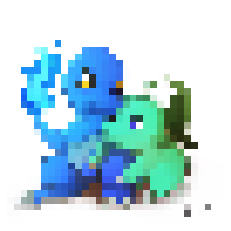

1


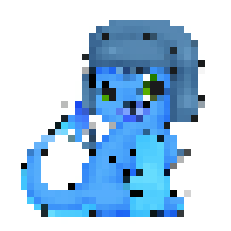

1


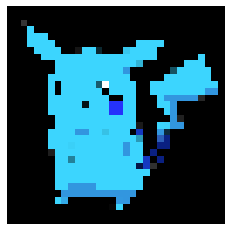

2


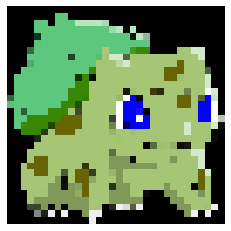

0


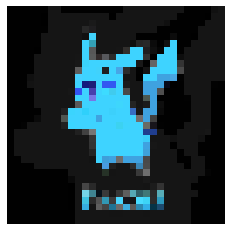

2


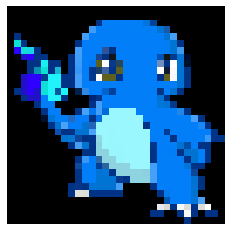

1


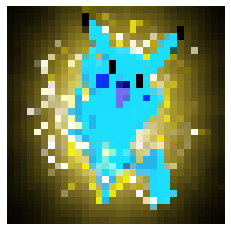

2


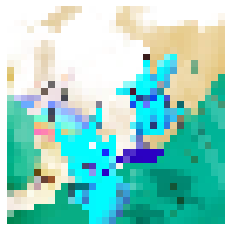

2


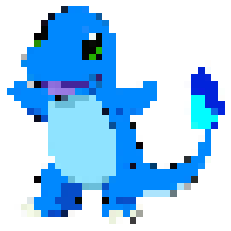

1


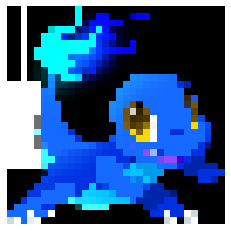

1


In [15]:
for i in range(10):
    draw_image(x[i])
    print(labels[i])

In [16]:
class SVM:
    def __init__(self,C=1.0):
        self.C=C
        self.W=0
        self.b=0
    def hingeloss(self,W,b,X,Y):
        loss = 0.0
        loss+=.5*np.dot(W,W.T)
        n=X.shape[0]
        for i in range(n):
            ti = Y[i]*(np.dot(W,X[i].T)+b)
            loss+=self.C*max(0,(1-ti))
            
        return loss[0][0]
    def fit(self,X,Y,batch_size=100,learning_rate=0.0001,max_itr=200):
        no_of_features=X.shape[1]
        no_of_samples=X.shape[0]
        n=learning_rate
        c=self.C
        W=np.zeros((1,no_of_features))
        bias=0
        losses=[]
        
        for i in range(max_itr):
            l=self.hingeloss(W,bias,X,Y)
            losses.append(l)
            idx = np.arange(no_of_samples)
            np.random.shuffle(idx)
            
            for batch_start in range(0,no_of_samples,batch_size):
                gradw=0
                gradb=0
                
                for j in range(batch_start,batch_start+batch_size):
                    if j<no_of_samples:
                        i=idx[j]
                        ti = Y[i]*(np.dot(W,X[i].T)+bias)
                        
                        if(ti>1):
                            gradw+=0
                            gradb+=0
                        else:
                            gradw+=c*Y[i]*X[i]
                            gradb+=c*Y[i]
                W=W-n*W+n*gradw
                bias=bias+n*gradb
            
        self.W=W
        self.b=bias
        return W,bias,losses
            

In [17]:
M=x.shape[0]
x=x.reshape(M,-1)
print(x.shape,labels.shape)

(304, 3072) (304,)


In [18]:
Classes = np.unique(labels)
def ClassWiseData(x,y):
    data={}
    for i in Classes:
        data[i]=[]
    for i in range(x.shape[0]):
        data[y[i]].append(x[i])
        
    for k in data.keys():
        data[k]=np.array(data[k])
    return data
def getDataPairforSvm(d1,d2):
    l1,l2=d1.shape[0],d2.shape[0]
    samples = d1.shape[0]+d2.shape[0]
    features = d1.shape[1]
    data_pair=np.zeros((samples,features))
    data_labels = np.zeros((samples,))
    data_pair[:d1.shape[0],:]=d1
    data_pair[d1.shape[0] :,:]=d2
    data_labels[:d1.shape[0]]=-1
    data_labels[d1.shape[0]:]=1
    return data_pair,data_labels

In [19]:
mySvm = SVM()
def Train_SvmClassifiers(x,y):
    Svm_Classifier={}
    for i in range(len(Classes)):
        Svm_Classifier[i]={}
        for j in range(i+1,len(Classes)):
            x_pair,y_pair=getDataPairforSvm(data[i],data[j])
            wts,b,loss = mySvm.fit(x_pair,y_pair)
            Svm_Classifier[i][j]=(wts,b)
            plt.plot(loss)
            plt.show()
    return Svm_Classifier

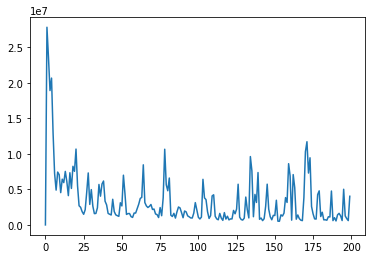

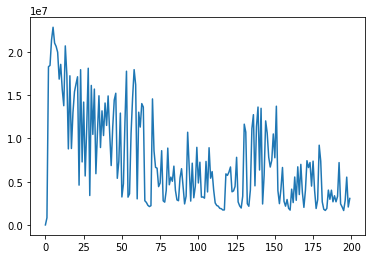

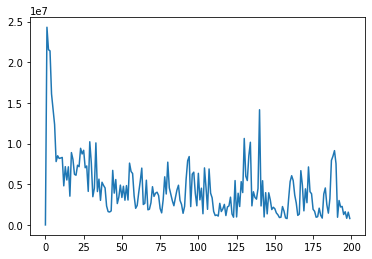

In [20]:
data = ClassWiseData(x,labels)
Svm_Classifier=Train_SvmClassifiers(x,labels)

In [21]:
def get_key(val): 
    for key, value in y_dict.items(): 
         if val == value: 
             return key 
def binary_predict(x,w,b):
    z=np.dot(x,w.T)+b
    if(z>=0):
        return 1
    else:
        return 0
def Predict(x):
    count=np.zeros((len(Classes),))
    for i in range(len(Classes)):
        for j in range(i+1,len(Classes)):
            w,b= Svm_Classifier[i][j]
            z=binary_predict(x,w,b)
            if(z==1):
                count[j]+=1
            else:
                count[i]+=1
    #return get_key(np.argmax(count))
    return np.argmax(count)
    

In [22]:
p = Path("./Test/Images")
test_images=p.glob("*.jpg")


In [23]:
x_test=[]
file_name=[]
for image_name in test_images:
    image_number = str(image_name).split("\\")[-1]
    file_name.append(image_number)
    img = cv2.imread(str(image_name))
    img=cv2.resize(img,(32,32))
    x_test.append(img)
x_test=np.array(x_test)
m=x_test.shape[0]
x_test=x_test.reshape(m,-1)
x_test.shape

(123, 3072)

In [24]:
def accuracy(X, y ):
    y_pred = []
    for i in range(X.shape[0]):
        p = Predict(X[i])
        y_pred.append(int(p))
        
    y_pred = np.array(y_pred)
    acc = (y_pred == y).sum()/y.shape[0]
    return acc

In [25]:
accuracy(x,labels)

0.625

In [26]:
from sklearn.svm import SVC


In [27]:
model = SVC(C=2)

In [28]:
model.fit(x, labels)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=2, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [29]:
model.score(x, labels)

0.7236842105263158

In [30]:
prediction=model.predict(x_test)

In [31]:
prediction=[get_key(i) for i in prediction]

In [32]:
test_output=[]
for i in range(len(file_name)):
    test_output.append([file_name[i],prediction[i]])
    

In [33]:
test_output

[['1100.jpg', 'Bulbasaur'],
 ['1101.jpg', 'Charmander'],
 ['1102.jpg', 'Bulbasaur'],
 ['1103.jpg', 'Bulbasaur'],
 ['1104.jpg', 'Bulbasaur'],
 ['1105.jpg', 'Charmander'],
 ['1106.jpg', 'Bulbasaur'],
 ['1107.jpg', 'Bulbasaur'],
 ['1108.jpg', 'Charmander'],
 ['1109.jpg', 'Bulbasaur'],
 ['1110.jpg', 'Bulbasaur'],
 ['1111.jpg', 'Charmander'],
 ['1112.jpg', 'Bulbasaur'],
 ['1113.jpg', 'Bulbasaur'],
 ['1114.jpg', 'Bulbasaur'],
 ['1115.jpg', 'Charmander'],
 ['1116.jpg', 'Bulbasaur'],
 ['1117.jpg', 'Charmander'],
 ['1118.jpg', 'Charmander'],
 ['1119.jpg', 'Bulbasaur'],
 ['1120.jpg', 'Pikachu'],
 ['1121.jpg', 'Charmander'],
 ['1122.jpg', 'Bulbasaur'],
 ['1123.jpg', 'Bulbasaur'],
 ['1124.jpg', 'Bulbasaur'],
 ['1125.jpg', 'Bulbasaur'],
 ['1126.jpg', 'Charmander'],
 ['1127.jpg', 'Charmander'],
 ['1128.jpg', 'Bulbasaur'],
 ['1129.jpg', 'Bulbasaur'],
 ['1130.jpg', 'Charmander'],
 ['1131.jpg', 'Bulbasaur'],
 ['1132.jpg', 'Bulbasaur'],
 ['1133.jpg', 'Charmander'],
 ['1134.jpg', 'Charmander'],
 ['1135.j

In [35]:
df = pd.DataFrame(test_output)

In [36]:
df.columns=["ImageId","NameOfPokemon"]

In [37]:
df

,ImageId,NameOfPokemon
0,1100.jpg,Bulbasaur
1,1101.jpg,Charmander
2,1102.jpg,Bulbasaur
3,1103.jpg,Bulbasaur
4,1104.jpg,Bulbasaur
...,...,...
118,2236.jpg,Charmander
119,2237.jpg,Charmander
120,2238.jpg,Charmander
121,2239.jpg,Charmander


In [41]:
df.to_csv("output.csv", index=False) 